In [1]:
library(Deriv)

In [2]:
n <- 100
betas <- rbeta(n,5,2)

In [3]:
betas[1:5]

[1] 0.8482392 0.6452206 0.8660840 0.4471269 0.8330882

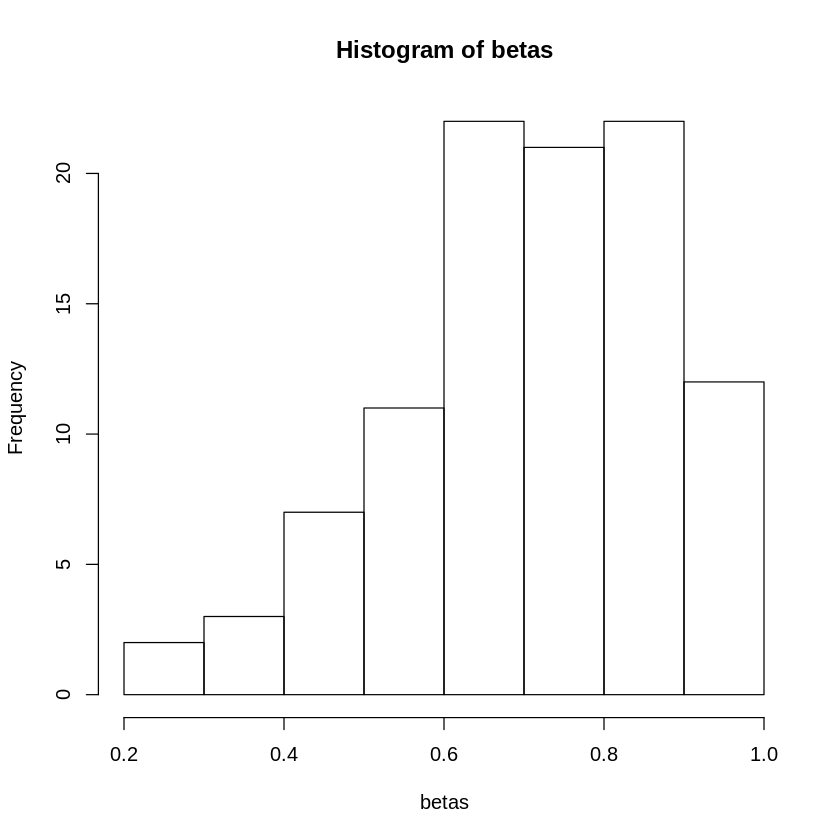

In [4]:
hist(betas)

In [36]:
sal <- function(a,b,c,d,y){
    a + b*sinh(c*asinh(y)+d)
    }
# sal = expression(a + b*sinh(c*asinh(y)+d))
drule[["asinh"]] <- alist(x=1/sqrt(x^2+1))

d_sal = Deriv(sal,"y")

# negative log likelihood function
# https://stackoverflow.com/questions/20479315/optim-function-argument-missing
nllf <- function(v){
    a <- 0 # nothing
    b <- v[2]
    c <- v[3]
    d <- v[4]
    return(-sum(d_sal(a,b,c,d,betas)))
    }


In [37]:
d_sal

function (a, b, c, d, y) 
b * c * cosh(c * asinh(y) + d)/sqrt(1 + y^2)

In [6]:
#log likelihood
# L = -1/2log|C|-1/2(y-\mu)C^{-1}(y-\mu)+\sum log \partial \phi(yi)/\partial yi - N/2 log2\pi

In [41]:
o = optim(par=c(a=0.1,b=0.1,c=0.1,d=0.1),fn=nllf)
o

$par
        a         b         c         d 
-611.6191  936.8571  562.9974  204.6682 

$value
[1] -1.280591e+308

$counts
function gradient 
     501       NA 

$convergence
[1] 1

$message
NULL

In [42]:
print(o.par)

ERROR: Error in print(o.par): object 'o.par' not found


In [ ]:
optim(rep(0.5,8),sal)
## a,b,c,d
## d seems to control the position

In [ ]:
hist(betas)